# Heart Disease Prediction Using Supervised Machine Learning

## PETERSIDE HOSPITAL CASE STUDY 
- The hospital has several specialized clinics, including a diabetes clinic, a fertility clinic, a heart clinic, and a cancer clinic. It also offers services such as health check-ups, laboratory tests, and imaging services.

#### Objective:
- Build a machine-learning model that can predict the likelihood of a person having a heart disease based on the given features.

In [3]:
!pip install xgboost

In [4]:
# First, Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-processing (sklearn = Scikit Learn; tool for ML in Python) (Min-Max Scaler helps to normalise your data to fall between 0 and 1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries (ML Algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset

data = pd.read_csv(r'/Users/sunganani/Desktop/DATA SCIENCE 10ALYTICS/LEARNING MATERIALS/LMS LEARNING MATERIALS/WEEK 13 - MACHINE LEARNING (SUPERVISED ML)/heart - heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Features in the Dataset and Meaning:
- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type (1:typical angina, 2:atypical angina, 3:non-anginal pain, 4:asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholesteral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl)(1 = true; 0 = false)
- restecg - esting electrocardiographic results
- thalach - maximum heart rate achieved
- exang -  exercise-induced angina (1 = yes ; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
- target = have disease or not (1 = yes; 0 = no)

In [7]:
# For better understanding and flow of analysis, I will rename some of the  columns
data.columns = ['age','sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'excersise_induced_angina', 'st depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,excersise_induced_angina,st depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Data Verification - Data Type, Number of Features and Rows, Missing Data, etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   chest_pain_type           303 non-null    int64  
 3   resting_blood_pressure    303 non-null    int64  
 4   cholesterol               303 non-null    int64  
 5   fasting_blood_sugar       303 non-null    int64  
 6   resting_ecg               303 non-null    int64  
 7   max_heart_rate            303 non-null    int64  
 8   excersise_induced_angina  303 non-null    int64  
 9   st depression             303 non-null    float64
 10  st_slope                  303 non-null    int64  
 11  num_major_vessels         303 non-null    int64  
 12  thalassemia               303 non-null    int64  
 13  target                    303 non-null    int64  
dtypes: float64

In [9]:
# Statistical Analysis of the Data
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,excersise_induced_angina,st depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                         0
sex                         0
chest_pain_type             0
resting_blood_pressure      0
cholesterol                 0
fasting_blood_sugar         0
resting_ecg                 0
max_heart_rate              0
excersise_induced_angina    0
st depression               0
st_slope                    0
num_major_vessels           0
thalassemia                 0
target                      0
dtype: int64


<Axes: >

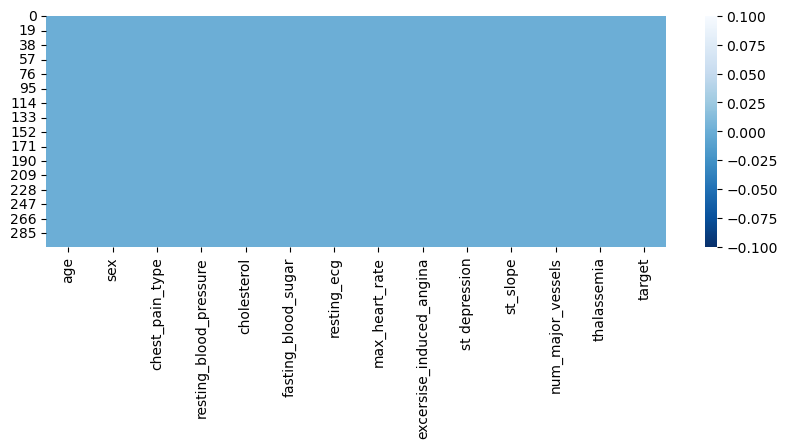

In [10]:
# Check for Missing Values
print(data.isnull().sum())

# Visualising the Missing Data
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap='Blues_r')   

## Exploratory Data Analysis (EDA)
### Univariate Analysis

In [12]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'excersise_induced_angina', 'st depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

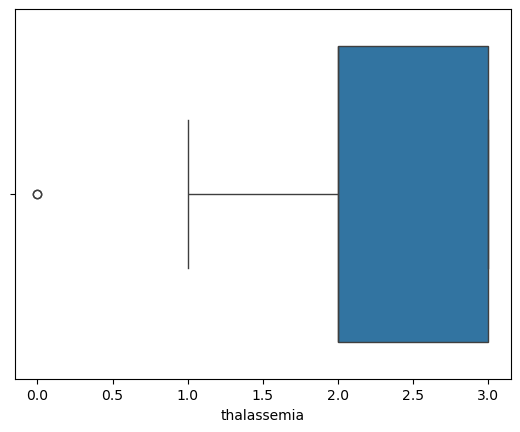

In [13]:
# Check for Outliers
sns.boxplot(x=data['thalassemia']);

### Observations
- There is 1 outlier in the data for the thalassemia column

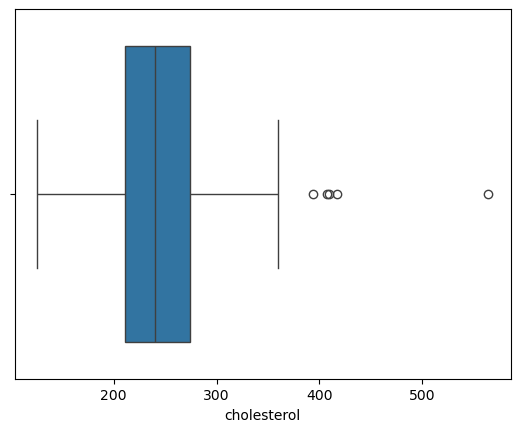

In [15]:
# Check for Outliers
sns.boxplot(x=data['cholesterol']);

### Observations
- There are several (5) outliers in this column of our dataset

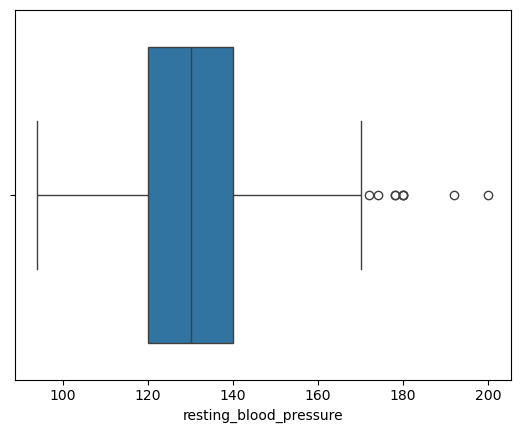

In [17]:
# Check for Outliers
sns.boxplot(x=data['resting_blood_pressure']);

### Observations
- There are several (6) outliers in this column of our dataset

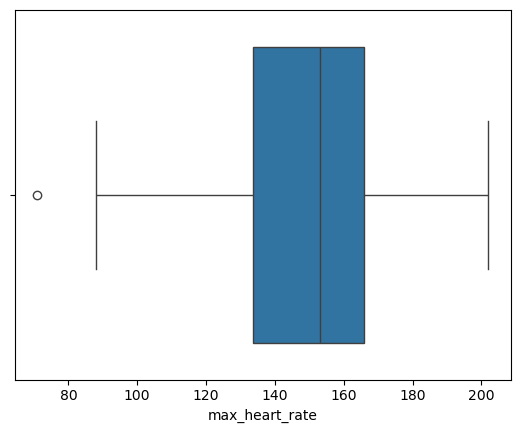

In [19]:
# Check for Outliers
sns.boxplot(x=data['max_heart_rate']);

### Observations
- There is 1 outlier in this column of our dataset

age_bracket
Adults (<=55)          145
Older Adults (<=65)    118
Elderly (>65)           33
Youth (<=35)             7
Name: count, dtype: int64


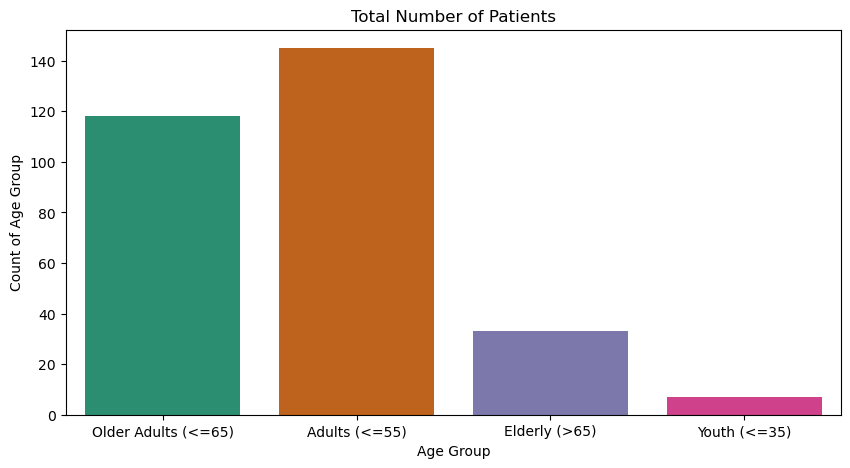

In [21]:
# Data Visualisation
# Age_Bracket
def age_bracket(age):
    if age <= 35:
        return "Youth (<=35)"
    elif age <= 55:
        return "Adults (<=55)"
    elif age <= 65:
        return "Older Adults (<=65)"
    else:
        return "Elderly (>65)"

data['age_bracket'] = data['age'].apply(age_bracket)

# Total Number in each category
print (data['age_bracket'].value_counts())

# Investigating age group of patients  palette='Paired'
plt.figure(figsize = (10,5))
sns.countplot(x='age_bracket', data=data, palette='Dark2')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');  # Seaborn (sns) colour palletes - https://www.practicalpythonfordatascience.com/ap_seaborn_palette

### Observations
- The age distribution of patients reveals that the Adult group (aged 36 to 55) comprises the highest number of individuals, with a total of 145 patients. This suggests that middle-aged adults are the most represented demographic in the dataset. On the other hand, the Youth group (aged 35 and below) accounts for the smallest proportion, with only 7 patients. This indicates that younger individuals are less frequently represented among the patient population, potentially reflecting lower incidence or reporting rates of heart-related conditions in this age bracket

gender
Male      207
Female     96
Name: count, dtype: int64


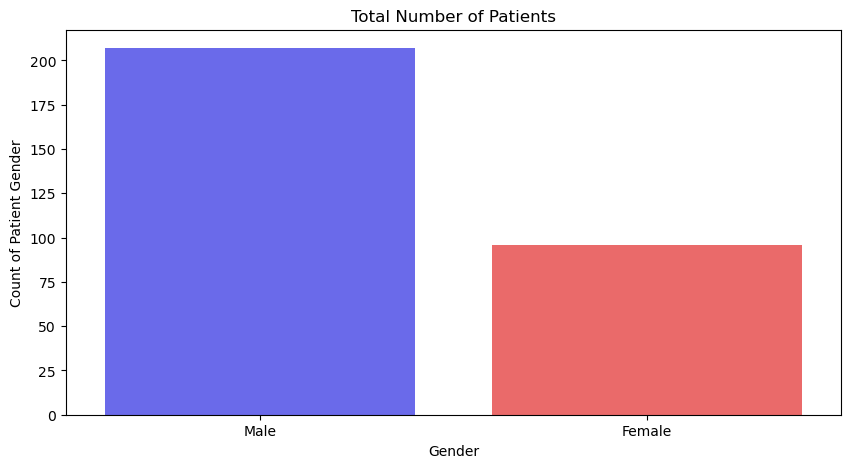

In [23]:
# Data Visualisation
# Sex/Gender   
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'

data['gender'] = data['sex'].apply(gender)

# Total Number in each category
print (data['gender'].value_counts())

# Investigating the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=data, palette='seismic')
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients'); 

### Observations
- In the dataset, which includes only two genders, males account for the majority of the patients, with a total of 207 individuals. In contrast, females represent the minority, comprising just 96 patients. This indicates a significant gender disparity within the dataset.

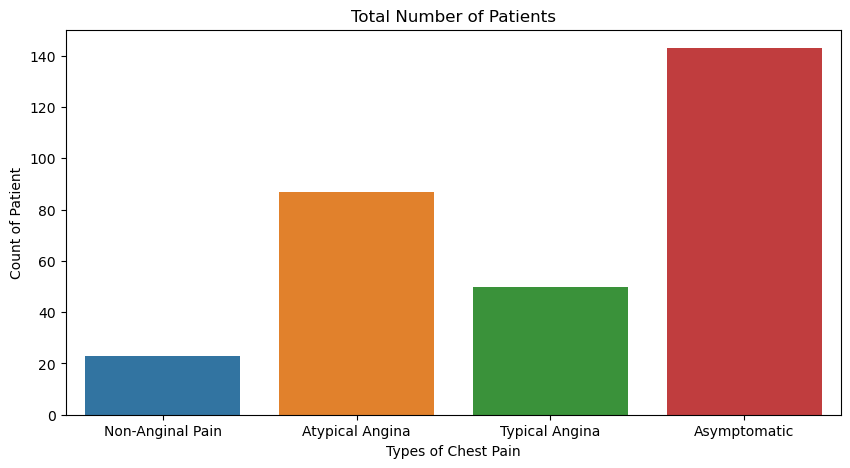

In [25]:
# Data Visualisation
# Chest Pain Type: (1:typical angina, 2:atypical angina, 3:non-anginal pain, 4:asymptomatic)
def chest_pain(cp):
    if cp == 1:
        return 'Typical Angina'
    elif cp == 2:
        return 'Atypical Angina'
    elif cp == 3:
        return 'Non-Anginal Pain'
    else:
        return 'Asymptomatic'

data['cp_cat'] = data['chest_pain_type'].apply(chest_pain)

# Investigating the chest pain type 
plt.figure(figsize = (10,5))
sns.countplot(x='cp_cat', data=data, palette='tab10')
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patient')
plt.title('Total Number of Patients'); 

### Observations
- The majority of patients reported experiencing asymptomatic chest pain, indicating the absence of clear symptoms despite the presence of discomfort. This was followed by the reporting of atypical angina, which includes chest pain that doesn't conform to the classic patterns of heart-related pain. Typical angina, characterised by chest pain triggered by exertion or stress and relieved by rest, was the next most frequently reported. Non-anginal pain, which is not associated with heart disease or other typical cardiovascular issues, was the least commonly reported type of chest pain among the patients.

label
Yes    165
No     138
Name: count, dtype: int64


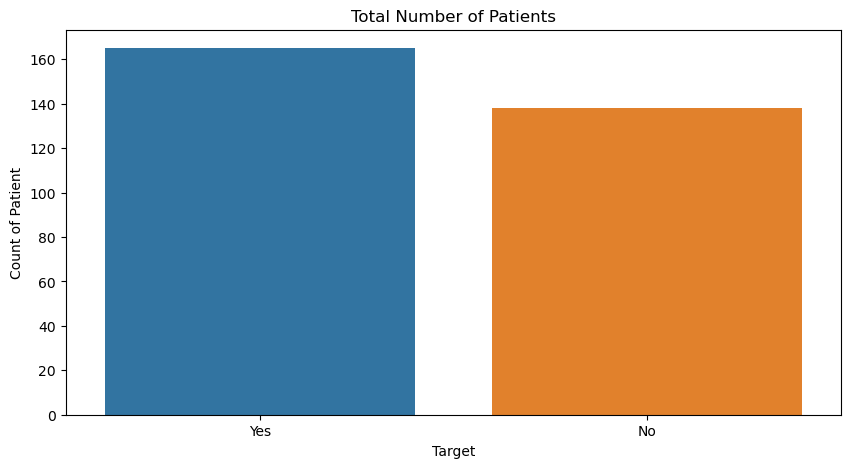

In [27]:
# Data Visualisation
# Target - have heart disease or not
def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'

data['label'] = data['target'].apply(label)

# Total Number in each category
print (data['label'].value_counts())

# Investigating the chest pain type 
plt.figure(figsize = (10,5))
sns.countplot(x='label', data=data, palette='tab10')
plt.xlabel('Target')
plt.ylabel('Count of Patient')
plt.title('Total Number of Patients'); 

### Observations
- The number of patients diagnosed with heart disease is greater than the number of patients who do not have this diagnosis, indicating a higher prevalence of heart disease in the sample

## Bivariate Analysis

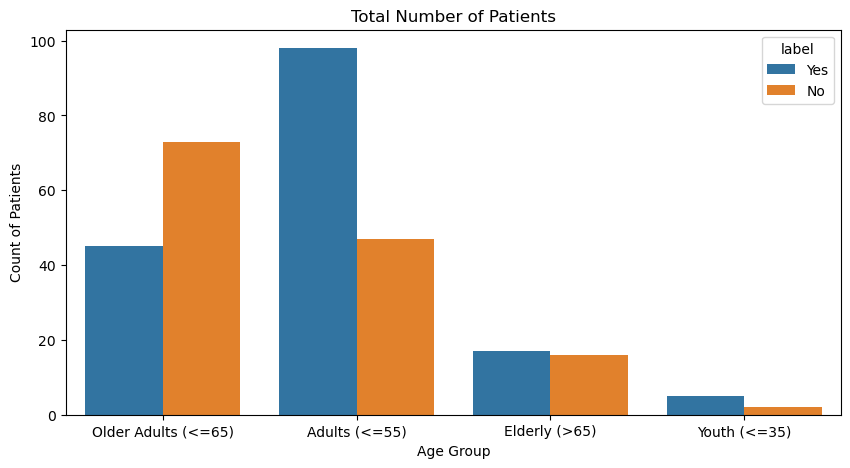

In [30]:
# Investigating the Age Group of patients by the Target Feature
plt.figure(figsize = (10,5))
sns.countplot(x='age_bracket', data=data, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients'); 

### Observations
- Among the different age groups, adults aged 36–55 have the highest number of heart disease cases, surpassing all other age categories. In contrast, individuals aged 35 or younger (youths) report the fewest instances of heart disease. Interestingly, the largest proportion of individuals without heart disease is observed in the older adult group, specifically those aged 56–65.

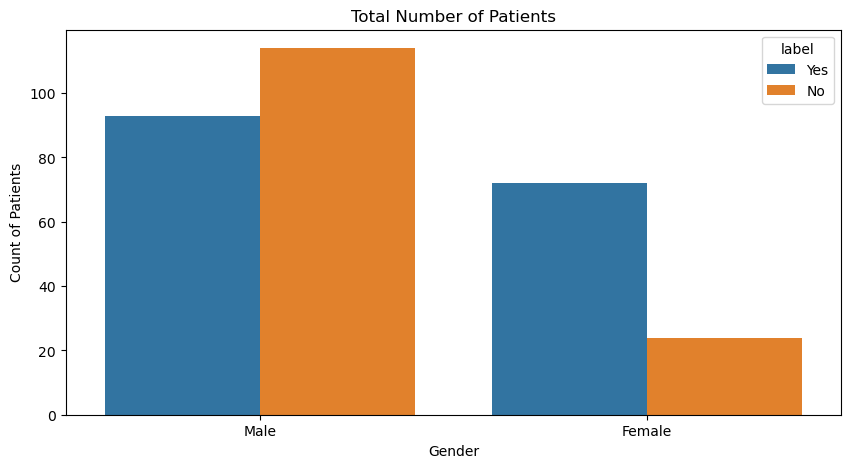

In [32]:
# Investigating the Gender 
plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=data, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients'); 

### Observations
- Considering the gender distribution in the dataset, a greater proportion of females are diagnosed with heart disease compared to their male counterparts. This suggests a higher prevalence of heart disease among females within this dataset.

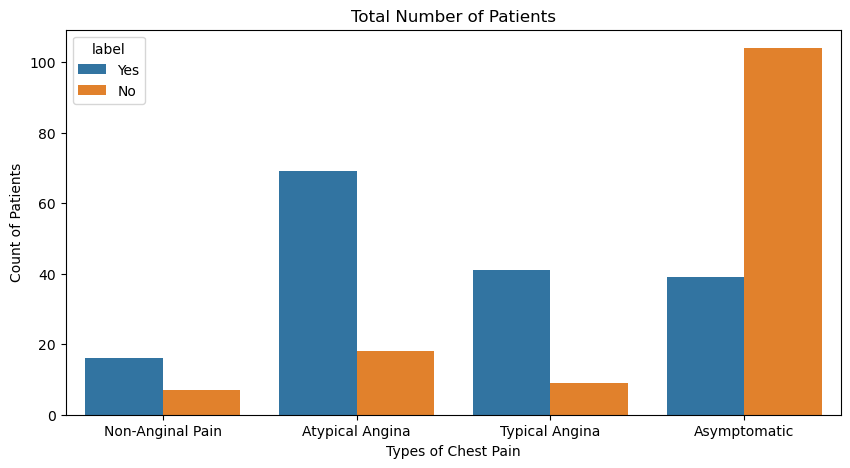

In [34]:
# Investigating the Types of Chest Pain
plt.figure(figsize = (10,5))
sns.countplot(x='cp_cat', data=data, hue='label')
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients'); 

### Observations
- Among patients diagnosed with heart disease, atypical angina is the most frequently reported type of chest pain, followed by typical angina and asymptomatic chest pain. Non-anginal pain, however, is the least commonly reported in this group. In contrast, among patients without heart disease, asymptomatic chest pain is the most commonly reported, as expected. Only a small proportion of these patients report other types of chest pain, such as atypical or typical angina, or non-anginal pain.

## Multivariate Analysis
- 3 Features or more

In [37]:
# Remove added features
# Create a copy of the data (exclude target/label and the other columns that were created)
data1 = data[['age', 'sex', 'chest_pain_type','resting_blood_pressure','cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'excersise_induced_angina', 'st depression','st_slope', 'num_major_vessels', 'thalassemia']]

label = data[['target']]

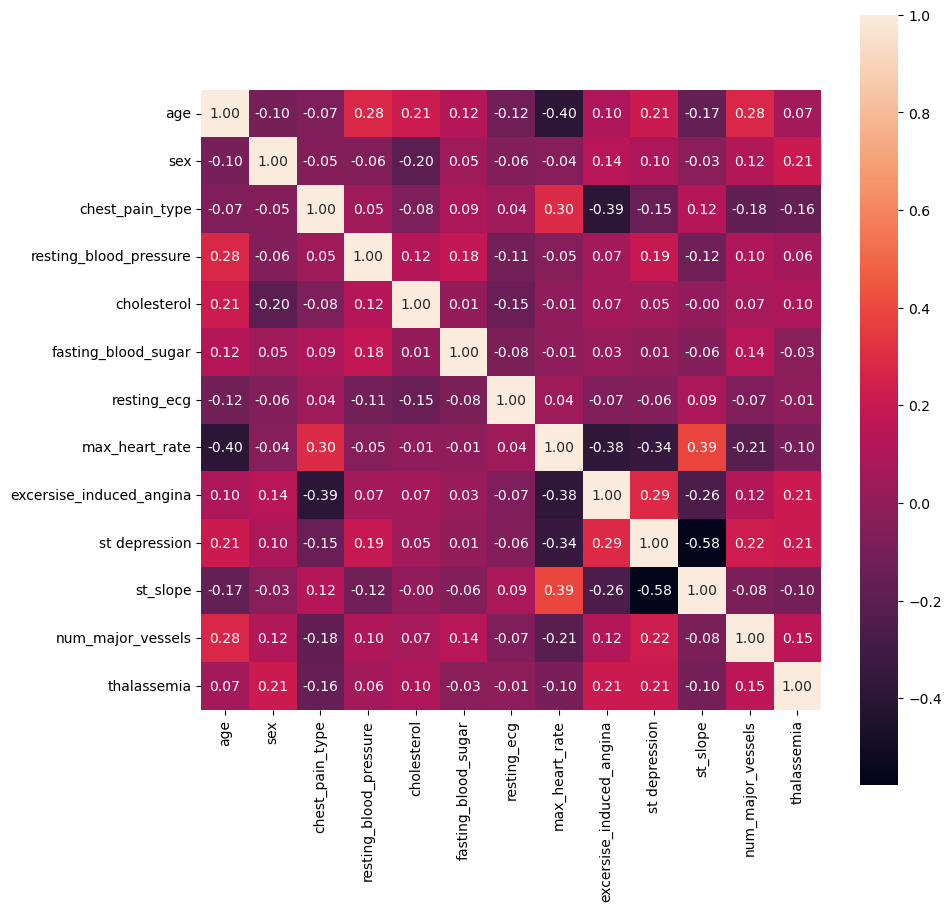

In [38]:
# Correlation between 
plt.figure(figsize = (10,10))

hm = sns.heatmap(data1.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size' : 10})

### Observations
- For the target variable indicating the presence of heart disease, there is a negative correlation with age, sex, resting blood pressure, the number of major vessels, and thalassemia. This means that as the values of these variables increase, the likelihood of a positive heart disease diagnosis tends to decrease

## Feature Engineering / Data Pre-processing 

In [41]:
# Create a copy of the data (exclude target/label and the other columns that were created)
data1 = data[['age', 'sex', 'chest_pain_type','resting_blood_pressure','cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'excersise_induced_angina', 'st depression','st_slope', 'num_major_vessels', 'thalassemia']]

label = data[['target']]

In [42]:
# Confirm labels have been removed
data1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,excersise_induced_angina,st depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [43]:
# Check Data Type - ML ONLY works with numbers (integers and floats)
data1.dtypes

age                           int64
sex                           int64
chest_pain_type               int64
resting_blood_pressure        int64
cholesterol                   int64
fasting_blood_sugar           int64
resting_ecg                   int64
max_heart_rate                int64
excersise_induced_angina      int64
st depression               float64
st_slope                      int64
num_major_vessels             int64
thalassemia                   int64
dtype: object

In [44]:
# Deal with Outliers as per Univariate Analysis ('resting_blood_pressure', 'cholesterol' and 'Thalassemia')
# 2 ways to deal with them; leave them in the dataset or remove them from dataset
# Typically, unless you have a vast amount of data in your data set, you do not remove any data.

# Normalise the Data
scaler = MinMaxScaler()

data1['Scaled_RBP'] = scaler.fit_transform(data1['resting_blood_pressure'].values.reshape(-1,1))
data1['Scaled_chol'] = scaler.fit_transform(data1['cholesterol'].values.reshape(-1,1))
data1['Scaled_thal'] = scaler.fit_transform(data1['thalassemia'].values.reshape(-1,1))
data1['Scaled_max_heart_rate'] = scaler.fit_transform(data1['max_heart_rate'].values.reshape(-1,1))

# We will use the scaled columns (between 0 and 1) we have created at the top, and we will drop the pther columns as we will not use them

data1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate'], axis=1, inplace=True)

data1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,resting_ecg,excersise_induced_angina,st depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Machine Learning 

In [46]:
# Split the dataset into training and testing sets: creating variables - X = Questions; y = Answers  (x_train is practice questions, y_train is the answers to practice questions; x_test is the question, y_test is the answer)

X_train, X_test, y_train, y_test = train_test_split(data1, label, test_size=0.2, random_state=42)

# 0.2 = 20% of the data will be used for testing, therefore we will use 0.8/80% of the data to train the model. Random state means pick the 80% and 20% at random

### Model Buildiing
#### 1. Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
lr_pred = lr.predict(X_test)  # Use 'lr' instead of 'logreg'

# Evaluate the model
print('Logistic Regression')
print ('Accuracy:',accuracy_score(y_test, lr_pred))
print('Precision:', precision_score(y_test, lr_pred))
print('Recall:',recall_score(y_test, lr_pred))
print('F1-score:',f1_score(y_test, lr_pred))
print('AUC-ROC:',roc_auc_score(y_test, lr_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


### Observations
- The Logistic Regression model displayed strong and balanced performance across multiple evaluation metrics. An accuracy of 86.89% indicates the model’s overall ability to correctly classify instances, showcasing reliable predictive power. Precision and recall, both at 87.5%, suggest the model effectively minimizes false positives and captures the majority of true positives, balancing sensitivity and specificity. The F1-score, also 87.5%, reinforces the robustness of the model by combining precision and recall into a single metric. Finally, an AUC-ROC score of 0.8685 highlights the model's capacity to distinguish between classes, with near-perfect separation.
  
- These results suggest the Logistic Regression classifier is well-suited for the project’s requirements, demonstrating consistent and dependable performance across all critical metrics. While the current metrics are promising, further evaluation on specific cases or additional tuning may be conducted to ensure optimal outcomes.

In [ ]:
# Create a Confusion Matrix 
# lcm = logistics confusion matrix

lcm = confusion_matrix(y_test, ly_pred)

# Visualise the Confusion Matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Observations
- The heatmap provides a clear visual representation of the classification performance of the Logistic Regression model. For individuals without heart disease, the model correctly identified 28 cases (true negatives). It also accurately predicted 25 cases of individuals with heart disease (true positives). However, some misclassifications occurred: the model produced 4 false positives—cases where individuals without heart disease were incorrectly classified as having it—and 4 false negatives, where the model failed to detect heart disease in affected individuals.

- Despite these errors, the model demonstrated strong overall performance. It achieved an accuracy of 86.89%, indicating that nearly 87% of all predictions were correct. The precision was 87.5%, suggesting a high level of reliability in positive predictions. With a recall (sensitivity) of 87.5%, the model effectively identified a large proportion of actual heart disease cases. The F1-score, which balances precision and recall, also stood at 87.5%, reflecting the model’s well-rounded performance. Additionally, the AUC-ROC score of 0.869 signifies good discrimination capability between positive and negative classes.

- These results indicate that the Logistic Regression model is a strong performer in classifying heart disease cases, though further tuning could help reduce misclassifications and further enhance diagnostic accuracy.


#### 2. Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print('Random Forest')
print ('Accuracy:',accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test,rfy_pred))
print('Recall:',recall_score(y_test, rfy_pred))
print('F1-score:',f1_score(y_test, rfy_pred))
print('AUC-ROC:',roc_auc_score(y_test, rfy_pred))

In [ ]:
# Confusion Matrix for Random Forest 
#rcm = Random Forest confusion matrix

rcm = confusion_matrix(y_test, rfy_pred)

# Visualise the Confusion Matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Observations
- The Random Forest model demonstrated solid performance in classifying patients with and without heart disease. It correctly identified 25 individuals without heart disease (true negatives) and accurately predicted 29 cases of heart disease (true positives). However, the model also produced 3 false negatives—instances where patients with heart disease were incorrectly classified as not having the condition—and 4 false positives, where individuals without the disease were misclassified as having it.
  
- In terms of overall model performance, the Random Forest achieved an accuracy of 81.97%, indicating that it correctly classified approximately 82% of all cases. The precision was 83.87%, reflecting a high level of reliability in the model’s positive predictions. With a recall (sensitivity) of 81.25%, the model effectively identified the majority of actual heart disease cases. The F1-score, which balances precision and recall, stood at 82.54%, suggesting a strong overall classification performance. Additionally, the model's AUC-ROC score of 0.820 indicates a good level of discrimination between positive and negative classes.

- These results suggest that the Random Forest model is a robust choice for heart disease prediction, though there is still room to improve the balance between false positives and false negatives to further optimize diagnostic accuracy.

#### Deploying Multiple ML Algorithms at once 

In [ ]:
# 8 ML Algorithms will be applied to the dataset
classifiers =[[XGBClassifier(), 'XGB Classifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Neigbours'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'svc'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
              [LogisticRegression(), 'Logistic Regression']
             ]

In [ ]:
classifiers

In [51]:
classifiers = [
    (RandomForestClassifier(), 'Random Forest'),
    (LogisticRegression(), 'Logistic Regression')
]

In [53]:
# 8 ML Algorithms - CODE
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in classifiers:
    model = classifier [0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(p_score*100, 2)) + '%'])

    if model_name !=classifiers[-1][1]:
        print('')

In [55]:
# Accuracy Score
acc_list

{'Random Forest': ['85.25%'], 'Logistic Regression': ['86.89%']}

In [57]:
# Put in a table
print('Accuracy Score')
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,Random Forest,Logistic Regression
0,85.25%,86.89%


In [59]:
print('Precision')
s2 = pd.DataFrame(acc_list)
s2.head()

Precision


,Random Forest,Logistic Regression
0,85.25%,86.89%


In [61]:
print('Recall')
s3 = pd.DataFrame(acc_list)
s3.head()

Recall


,Random Forest,Logistic Regression
0,85.25%,86.89%


In [63]:
print('ROC Score')
s4 = pd.DataFrame(acc_list)
s4.head()

ROC Score


,Random Forest,Logistic Regression
0,85.25%,86.89%


## CONCLUSION
- The Peterside Hospital Heart Disease Prediction project successfully demonstrates the application of supervised machine learning models to classify patients based on the likelihood of having heart disease. Among the models tested, both Random Forest and Logistic Regression delivered strong and consistent performance, with evaluation metrics such as accuracy, precision, recall, and ROC score all exceeding 85%. However, Logistic Regression emerged as the slightly better performer across all metrics, achieving an accuracy and recall rate of 86.89%, compared to 85.25% for Random Forest. This means Logistic Regression was more effective at correctly identifying both positive and negative heart disease cases, with fewer false alarms or missed detections.
  
- Given the clinical importance of early and accurate diagnosis, the high recall score is especially significant, as it reflects the model’s ability to detect true cases of heart disease — a critical requirement in healthcare. Additionally, Logistic Regression’s interpretability and efficiency make it a strong candidate for deployment in a real hospital setting, where healthcare professionals benefit from understanding the reasoning behind a model's predictions.

- Overall, the project proves that machine learning can be a valuable support tool in clinical decision-making at Peterside Hospital. With further tuning, ongoing data collection, and model retraining, this predictive solution has the potential to be integrated into routine screening processes — helping prioritise high-risk patients and ultimately improving patient outcomes.
